**Problem Statement
Topic Modeling for Research Articles
Researchers have access to large online archives of scientific articles. As a consequence, finding relevant articles has become more difficult. Tagging or topic modelling provides a way to give token of identification to research articles which facilitates recommendation and search process.

Given the abstract and title for a set of research articles, predict the topics for each article included in the test set.

Note that a research article can possibly have more than 1 topic. The research article abstracts and titles are sourced from the following 6 topics:

1. Computer Science

2. Physics

3. Mathematics

4. Statistics

5. Quantitative Biology

6. Quantitative Finance

Data Dictionary**

In [73]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/janatahack-independence-day-2020-ml-hackathon/train.csv
/kaggle/input/janatahack-independence-day-2020-ml-hackathon/sample_submission_UVKGLZE.csv
/kaggle/input/janatahack-independence-day-2020-ml-hackathon/test.csv


In [74]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [75]:
from fastai.text import *


In [76]:
df_train = pd.read_csv('/kaggle/input/janatahack-independence-day-2020-ml-hackathon/train.csv')
df_test = pd.read_csv('/kaggle/input/janatahack-independence-day-2020-ml-hackathon/test.csv')
sample_submission = pd.read_csv('/kaggle/input/janatahack-independence-day-2020-ml-hackathon/sample_submission_UVKGLZE.csv')
df_train.head()

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,1,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,1,0,0,0,0,0
1,2,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0,0
2,3,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,0,0,1,0,0,0
3,4,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0,0
4,5,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,1,0,0,1,0,0


In [77]:
df_test.head()

,ID,TITLE,ABSTRACT
0,20973,Closed-form Marginal Likelihood in Gamma-Poiss...,We present novel understandings of the Gamma...
1,20974,Laboratory mid-IR spectra of equilibrated and ...,Meteorites contain minerals from Solar Syste...
2,20975,Case For Static AMSDU Aggregation in WLANs,Frame aggregation is a mechanism by which mu...
3,20976,The $Gaia$-ESO Survey: the inner disk intermed...,Milky Way open clusters are very diverse in ...
4,20977,Witness-Functions versus Interpretation-Functi...,Proving that a cryptographic protocol is cor...


In [78]:
print(df_train.shape)
print(df_test.shape)

(20972, 9)
(8989, 3)


In [79]:

df_train['ABSTRACT'][94]

'  Vanadium pentoxide (V2O5), the most stable member of vanadium oxide family,\nexhibits interesting semiconductor to metal transition in the temperature range\nof 530-560 K. The metallic behavior originates because of the reduction of V2O5\nthrough oxygen vacancies. In the present report, V2O5 nanorods in the\northorhombic phase with crystal orientation of (001) are grown using vapor\ntransport process. Among three nonequivalent oxygen atoms in a VO5 pyramidal\nformula unit in V2O5 structure, the role of terminal vanadyl oxygen (OI) in the\nformation of metallic phase above the transition temperature is established\nfrom the temperature-dependent Raman spectroscopic studies. The origin of the\nmetallic behavior of V2O5 is also understood due to the breakdown of pdpi bond\nbetween OI and nearest V atom instigated by the formation of vanadyl OI\nvacancy, confirmed from the downward shift of the bottom most split-off\nconduction bands in the material with increasing temperature.\n'

In [80]:

df_test['ABSTRACT'][67]

'  We consider the problem of reconstructing a rank-$k$ $n \\times n$ matrix $M$\nfrom a sampling of its entries. Under a certain incoherence assumption on $M$\nand for the case when both the rank and the condition number of $M$ are\nbounded, it was shown in \\cite{CandesRecht2009, CandesTao2010, keshavan2010,\nRecht2011, Jain2012, Hardt2014} that $M$ can be recovered exactly or\napproximately (depending on some trade-off between accuracy and computational\ncomplexity) using $O(n \\, \\text{poly}(\\log n))$ samples in super-linear time\n$O(n^{a} \\, \\text{poly}(\\log n))$ for some constant $a \\geq 1$.\nIn this paper, we propose a new matrix completion algorithm using a novel\nsampling scheme based on a union of independent sparse random regular bipartite\ngraphs. We show that under the same conditions w.h.p. our algorithm recovers an\n$\\epsilon$-approximation of $M$ in terms of the Frobenius norm using $O(n\n\\log^2(1/\\epsilon))$ samples and in linear time $O(n \\log^2(1/\\epsilon)

In [81]:
df_lang_train = pd.concat([df_train['ABSTRACT'],df_test['ABSTRACT']]).reset_index()

In [89]:
df_lang_train['ABSTRACT'][94]

'  Vanadium pentoxide (V2O5), the most stable member of vanadium oxide family,\nexhibits interesting semiconductor to metal transition in the temperature range\nof 530-560 K. The metallic behavior originates because of the reduction of V2O5\nthrough oxygen vacancies. In the present report, V2O5 nanorods in the\northorhombic phase with crystal orientation of (001) are grown using vapor\ntransport process. Among three nonequivalent oxygen atoms in a VO5 pyramidal\nformula unit in V2O5 structure, the role of terminal vanadyl oxygen (OI) in the\nformation of metallic phase above the transition temperature is established\nfrom the temperature-dependent Raman spectroscopic studies. The origin of the\nmetallic behavior of V2O5 is also understood due to the breakdown of pdpi bond\nbetween OI and nearest V atom instigated by the formation of vanadyl OI\nvacancy, confirmed from the downward shift of the bottom most split-off\nconduction bands in the material with increasing temperature.\n'

In [90]:
bs = 32

In [91]:
data_lm = (TextList.from_df(df_lang_train,cols = 'ABSTRACT')
           .split_by_rand_pct(0.1)
           
            .label_for_lm()           
           #We want to do a language model so we label accordingly
            .databunch(bs=bs))

In [92]:
data_lm.save('tmp_lm')

In [93]:
data_lm.show_batch()

idx,text
0,"detection purpose for \n multiple non - overlap target . xxmaj last but not least , this architecture can achieve \n one - shot learning in some cases using those invariance . \n xxbos xxmaj we introduce and develop the notion of spherical polyharmonics , which are a \n natural generalisation of spherical harmonics . xxmaj in particular we study the \n theory of zonal"
1,", peripheral blurring in our eyes may have \n evolved for optimal object recognition , rather than merely to satisfy wiring \n constraints . \n xxbos xxmaj molecular dynamics simulates the ~ movements of atoms . xxmaj due to its high cost , \n many methods have been developed to "" push the ~ simulation forward "" . xxmaj one of them , \n metadynamics"
2,in accuracy while maintaining high block sparsity and reducing the \n overall parameter count . xxmaj our technique works with a variety of block sizes up \n to xxunk . xxmaj block - sparse rnns eliminate overheads related to data storage and \n irregular memory accesses while increasing hardware efficiency compared to \n unstructured sparsity . \n xxbos xxmaj with any ( not necessarily proper
3,group acting freely and transitively on the product of two regular trees of \n degree $ d_1 $ and $ d_2$. xxmaj we develop an algorithm which computes the closure of \n the projection of $ \ xxmaj gamma$ on $ \ xxunk under the hypothesis that \n $ xxunk \ geq 6 $ is even and that the local action of $ \ xxmaj gamma$ on
4,"the number \n of connections per neuron . xxmaj our work shows how strong correlations can be \n consistent with highly irregular activity in recurrent networks , two key \n features of neuronal dynamics in the central nervous system . \n xxbos xxmaj the present study introduce the human capital component to the xxmaj fama and \n xxmaj french five - factor model proposing an"


In [94]:
learn = language_model_learner(data_lm, arch=AWD_LSTM ,drop_mult=0.3)

In [95]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


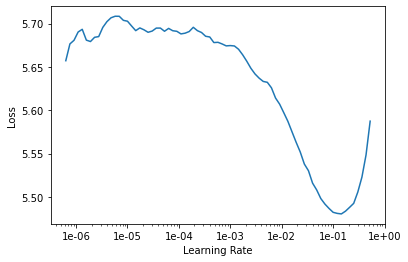

In [96]:
learn.recorder.plot(skip_end=15)

In [97]:
learn.unfreeze()

In [98]:
learn.fit_one_cycle(5, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.123689,4.022976,0.328024,04:44
1,4.127691,4.030537,0.328528,04:46
2,3.931984,3.859159,0.344428,04:47
3,3.712704,3.692123,0.362158,04:47
4,3.475259,3.654756,0.366459,04:49


In [99]:
learn.save('fine_tuned')

In [100]:
learn.load('fine_tuned');

In [101]:
TEXT = "The gravity of"
N_WORDS = 40
N_SENTENCES = 2
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))

The gravity of cosmological interactions between 
  interacting Newtonian and Anti - Newton gravity is studied . The key problem is to 
  represent the cosmological field , and the evolution of the universe is shown to 
  be
The gravity of universe is correlated with the field of 
  gravitational lensing and the gravitational potential of dark matter . In 
  addition to the evolution of the Universe , it is generally assumed that a 
  constraint , in


In [102]:
learn.save_encoder('fine_tuned_enc')

In [103]:
df_train.columns

Index(['ID', 'TITLE', 'ABSTRACT', 'Computer Science', 'Physics', 'Mathematics',
       'Statistics', 'Quantitative Biology', 'Quantitative Finance'],
      dtype='object')

In [104]:
df_test

,ID,TITLE,ABSTRACT
0,20973,Closed-form Marginal Likelihood in Gamma-Poiss...,We present novel understandings of the Gamma...
1,20974,Laboratory mid-IR spectra of equilibrated and ...,Meteorites contain minerals from Solar Syste...
2,20975,Case For Static AMSDU Aggregation in WLANs,Frame aggregation is a mechanism by which mu...
3,20976,The $Gaia$-ESO Survey: the inner disk intermed...,Milky Way open clusters are very diverse in ...
4,20977,Witness-Functions versus Interpretation-Functi...,Proving that a cryptographic protocol is cor...
...,...,...,...
8984,29957,Supporting mixed-datatype matrix multiplicatio...,We approach the problem of implementing mixe...
8985,29958,An axiomatic basis for Blackwell optimality,In the theory of Markov decision processes (...
8986,29959,GeneVis - An interactive visualization tool fo...,GeneVis is a web-based tool to visualize com...
8987,29960,Quantifying the causal effect of speed cameras...,This paper quantifies the effect of speed ca...


In [105]:
#     Building a multi label classifier
label_cols = ['Computer Science', 'Physics', 'Mathematics','Statistics', 'Quantitative Biology', 'Quantitative Finance']
test_datalist = TextList.from_df(df_test, cols='ABSTRACT', vocab=data_lm.vocab)


data_clas = (TextList.from_df(df_train, cols='ABSTRACT', vocab=data_lm.vocab)
             .split_by_rand_pct(0.2)
             .label_from_df(cols= label_cols , classes=label_cols)
             .add_test(test_datalist)
             .databunch(bs=bs))

In [106]:
data_clas.save('tmp_clas')


In [107]:
data_clas.show_batch()

text,target
"xxbos xxmaj the xxmaj riemann $ \ xxmaj xi(z)$ function ( even in $ z$ ) admits a xxmaj fourier transform of an \n even kernel $ \ xxmaj xxunk t / 2 } \ xxunk t / 2 } \ xxunk xxmaj here \n $ \ xxunk \ xxunk and $ \ xxunk is a xxmaj jacobi theta function , a \n modular form of weight",Mathematics
"xxbos xxmaj let $ \ sigma$ be arc - length measure on $ xxup s^1 \ subset \ mathbb xxup r^2 $ and $ \ xxmaj theta$ \n denote rotation by an angle $ \ theta \ in ( 0 , \ xxunk xxmaj define a model bilinear \n generalized xxmaj radon transform , $ $ b _ { \ xxunk , xxunk \ xxunk } f(x -",Mathematics
"xxbos xxmaj observations of the xxup cmb today allow us to answer detailed questions about the \n properties of our xxmaj universe , targeting both standard and non - standard physics . \n xxmaj in this paper , we study the effects of varying fundamental constants ( i.e. , the \n fine - structure constant , $ \ alpha _ { \ rm xxup xxunk , and",Physics
"xxbos xxmaj the recent announcement of a xxmaj neptune - sized exomoon candidate around the \n transiting xxmaj jupiter - sized object xxmaj xxunk b could indicate the presence of a \n hitherto unknown kind of gas giant moons , if confirmed . xxmaj three transits have \n been observed , allowing radius estimates of both objects . xxmaj here we investigate \n possible mass regimes",Physics
"xxbos xxmaj the exponential - time hypothesis ( xxup eth ) states that xxup 3-sat is not solvable in \n subexponential time , i.e. not solvable in xxmaj o(c^n ) time for arbitrary c > 1 , \n where n denotes the number of variables . xxmaj problems like k - xxup sat can be viewed as \n special cases of the constraint satisfaction problem ( xxup",Computer Science


In [108]:
acc_02 = partial(accuracy_thresh, thresh=0.45)
f_score = partial(fbeta, thresh=0.45, beta = 1)

learn = text_classifier_learner(data_clas,arch=AWD_LSTM, drop_mult=0.5 ,metrics=[acc_02, f_score])
learn.load_encoder('fine_tuned_enc')


RNNLearner(data=TextClasDataBunch;

Train: LabelList (16778 items)
x: TextList
xxbos xxmaj predictive models allow subject - specific inference when analyzing disease 
  related alterations in neuroimaging data . xxmaj given a subject 's data , inference can 
  be made at two levels : global , i.e. xxunk condition presence for the 
  subject , and local , i.e. detecting condition effect on each individual 
  measurement extracted from the subject 's data . xxmaj while global inference is widely 
  used , local inference , which can be used to form subject - specific effect maps , 
  is rarely used because existing models often yield noisy detections composed of 
  dispersed isolated islands . xxmaj in this article , we propose a reconstruction 
  method , named xxup rsm , to improve subject - specific detections of predictive 
  modeling approaches and in particular , binary classifiers . xxup rsm specifically 
  aims to reduce noise due to sampling error associated with using a finite

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


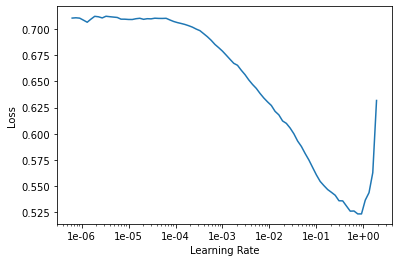

In [109]:
learn.lr_find()
learn.recorder.plot()

In [110]:
# Fit the model based on selected learning rate
learn.fit_one_cycle(5, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))

learn.show_results()

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.221164,0.182835,0.923303,0.822612,01:00
1,0.208948,0.174345,0.928628,0.835948,00:55
2,0.206383,0.168990,0.931609,0.843268,00:54
3,0.193896,0.164036,0.931370,0.846416,01:02
4,0.190081,0.164374,0.932165,0.845971,00:55


text,target,prediction
"xxbos xxmaj topological xxmaj data xxmaj analysis ( tda ) is a recent and fast growing eld providing a \n set of new topological and geometric tools to infer relevant features for \n possibly complex data . xxmaj this paper is a brief introduction , through a few \n selected topics , to basic fundamental and practical aspects of tda for non \n experts . 1",Computer Science;Mathematics;Statistics,Statistics
"xxbos xxmaj by using n - body hydrodynamical cosmological simulations in which the \n chemistry of major metals and molecules is consistently solved for , we study \n the interaction of metallic fine - structure lines with the xxup cmb . xxmaj our analysis \n shows that the collisional induced emissions in the xxup oi 145 $ \ mu$m and xxup cii 158 \n $ \",Physics,Physics
"xxbos xxmaj in a recent note [ 8 ] , the author provides a counterexample to the global \n convergence of what his work refers to as "" the xxup dsos and xxup sdsos hierarchies "" for \n polynomial optimization problems ( xxunk ) and xxunk that this refutes claims \n in our extended abstract [ 4 ] and slides in [ 3 ] . xxmaj the",Computer Science;Statistics,Computer Science
xxbos xxmaj this paper addresses the problems of quantum spectral curves and xxup 4d limit for \n the melting crystal model of xxup 5d xxup susy $ xxup u(1)$ xxmaj yang - xxmaj mills theory on \n $ \ mathbb{r}^4 \ times xxup s^1$. xxmaj the partition function $ z ( \ mathbf{t})$ deformed by an \n infinite number of external potentials is a tau function of,Physics;Mathematics,Physics;Mathematics
"xxbos xxmaj we present $ \ xxunk observations of neutron star ( xxup ns ) low - mass x - ray \n binaries : xxup 4u 1636 - 53 , xxup gx 17 + 2 , and xxup 4u 1705 - 44 . xxmaj we observed xxup 4u 1636 - 53 in the \n hard state , with an xxmaj eddington fraction , $ f _ { \",Physics,Physics


In [112]:
learn.save('first')

In [113]:
learn.load('first');

In [114]:
preds, target = learn.get_preds(DatasetType.Test, ordered=True)

In [115]:
preds

tensor([[2.4991e-01, 1.8112e-02, 1.5683e-01, 9.2467e-01, 2.0282e-03, 1.2007e-02],
        [3.9678e-04, 9.9693e-01, 1.0270e-03, 6.0538e-04, 2.0807e-05, 1.3458e-06],
        [9.7479e-01, 1.2877e-02, 5.1516e-02, 1.1904e-02, 7.5510e-04, 6.5220e-04],
        ...,
        [4.9565e-01, 9.1652e-02, 9.7006e-03, 6.0990e-01, 6.3304e-01, 9.9006e-04],
        [2.3534e-01, 1.5824e-02, 1.8465e-01, 8.3189e-01, 1.6189e-02, 3.1854e-03],
        [6.0953e-01, 1.9814e-03, 6.8310e-01, 1.7673e-02, 1.3335e-04, 4.5905e-05]])

In [111]:
submission = pd.concat([df_test, pd.DataFrame(preds.numpy(), columns = label_cols)], axis=1)


submission['Computer Science'] = submission['Computer Science'].apply(lambda x: 1 if x > 0.45 else 0)
submission['Physics'] = submission['Physics'].apply(lambda x: 1 if x > 0.45 else 0)
submission['Mathematics'] = submission['Mathematics'].apply(lambda x: 1 if x > 0.45 else 0)
submission['Statistics'] = submission['Statistics'].apply(lambda x: 1 if x > 0.45 else 0)
submission['Quantitative Biology'] = submission['Quantitative Biology'].apply(lambda x: 1 if x > 0.45 else 0)
submission['Quantitative Finance'] = submission['Quantitative Finance'].apply(lambda x: 1 if x > 0.45 else 0)

submission.drop(['TITLE','ABSTRACT'], inplace = True, axis = 1) 
submission.to_csv('submission.csv', index=False)
submission.head()

,ID,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,20973,0,0,0,1,0,0
1,20974,0,1,0,0,0,0
2,20975,1,0,0,0,0,0
3,20976,0,1,0,0,0,0
4,20977,1,0,0,0,0,0
